### Attempts to find all the points within a sphere

For my first attempt I will generate the points in a parallelepiped, compare distances, and eliminate the points that lie outside the sphere. It would be nice to use symmetry to reduce the computation.

In [1]:
import itertools
import numpy as np
from BZI.symmetry import make_rptvecs
from BZI.plots import PlotMesh
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
%matplotlib notebook

In [2]:
def sphere_pts(A,r2,offset):
    """ Calculate all the points within a sphere that are 
    given by an integer linear combination of the columns of 
    A.
    
    Args:
        A (numpy.ndarray): the grid basis with the columns 
            representing basis vectors.
        r2 (float): the squared radius of the sphere.
        offset(list or numpy.ndarray): a vector that points to the center
            of the sphere.
        
    Returns:
        grid (list): an array of grid coordinates in cartesian
            coordinates.
    """
    
    # This is a parameter that should help deal with rounding error.
    eps = 1e-9
    offset = np.asarray(offset)
    
    # Put the offset in lattice coordinates
    oi= np.round(np.dot(np.linalg.inv(A),offset))
    # Find a lattice point close to the offset
    oi = oi.astype(int)
    
    r = np.sqrt(r2)
    V = np.linalg.det(A)
    n = [0,0,0]
    for i in range(3):
        # Add 1 because the offset was rounded to the nearest lattice point.
        n[i] = int(np.ceil(np.linalg.norm(np.cross(A[:,(i+1)%3],A[:,(i+2)%3]))*r/V) + 1)

    grid = []
    for i,j,k in itertools.product(range(-n[0] + oi[0], n[0] + oi[0]),
                                   range(-n[1] + oi[1], n[1] + oi[1]),
                                   range(-n[2] + oi[2], n[2] + oi[2])):
        pt = np.dot(A,[i,j,k])
        if np.dot(pt-offset,pt-offset) <= r2 + eps:
            grid.append(pt)
        else:
            continue                
    return grid

In [30]:
# def sphere_pts(A,r2,offset):
#     """ Calculate all the points within a sphere that are 
#     given by an integer linear combination of the columns of 
#     A.
    
#     Args:
#         A (numpy.ndarray): the grid basis with the columns 
#             representing basis vectors.
#         r2 (float): the squared radius of the sphere.
#         offset(list or numpy.ndarray): a vector that points to the center
#             of the sphere.
        
#     Returns:
#         grid (list): an array of grid coordinates in cartesian
#             coordinates.
#     """
    
#     # This is a parameter that should help deal with rounding error.
#     eps = 1e-9
#     offset = np.asarray(offset)
#     # Put the offset in lattice coordinates
#     oi= np.round(np.dot(np.linalg.inv(A),offset))
#     # Find a lattice point close to the offset
#     oi = oi.astype(int)
#     # scale the integers by about 100% to ensure all points are enclosed.
#     scale = 2.
#     imax,jmax,kmax = map(int,np.ceil(scale*np.sqrt(r2/np.sum(np.dot(A,A),0))))
    
#     grid = []
#     for i,j,k in itertools.product(range(-imax + oi[0],imax + oi[0]),
#                                    range(-jmax + oi[1],jmax + oi[1]),
#                                    range(-kmax + oi[2],kmax + oi[2])):
#         pt = np.dot(A,[i,j,k])
#         if np.dot(pt-offset,pt-offset) <= r2 + eps:
#             grid.append(pt)
#         else:
#             continue                
#     return grid

In [3]:
def hollow_sphere_pts(A,r1,r2,offset):
    """ Calculate all the points between two spheres that are    
    given by an integer linear combination of the columns of
    A.
    
    Args:
        A (numpy.ndarray): the grid basis with the columns
            representing basis vectors.
        r1 (float): the squared radius of the interior sphere.
        r2 (float): the squared radius of the exterior sphere.
        offset(list or numpy.ndarray): a vector that points to the center
            of the sphere.
        
    Returns:
        grid (list): an array of grid coordinates in cartesian
            coordinates.
    """
    
    # This is a parameter that should help deal with rounding error.
    eps = 1e-9
    r1 += eps
    r2 += eps
    offset = np.asarray(offset)
    # Put the offset in lattice coordinates
    oi= np.round(np.dot(np.linalg.inv(A),offset))
    # Find a lattice point close to the offset
    oi = oi.astype(int)
    # scale the integers by about 100% to ensure all points are enclosed.
    scale = 2.
    imax,jmax,kmax = map(int,np.ceil(scale*np.sqrt(r2/np.sum(np.dot(A,A),0))))
    
    grid = []
    for i,j,k in itertools.product(range(-imax + oi[0],imax + oi[0]),
                                   range(-jmax + oi[1],jmax + oi[1]),
                                   range(-kmax + oi[2],kmax + oi[2])):
        pt = np.dot(A,[i,j,k])
        if np.dot(pt-offset,pt-offset) <= r2:
            if np.dot(pt-offset,pt-offset) >= r1:
                grid.append(pt)
            else:
                continue     
        else:
            continue
    return grid

In [4]:
def test_sphere_pts(A,r2,offset):
    """ Calculate all the points that are given by an integer linear 
    combination of the columns of A.
    
    Args:
        A (numpy.ndarray): the grid basis with the columns 
            representing basis vectors.
        r2 (float): the squared radius of the sphere.
        offset(list or numpy.ndarray): a vector that points to the center
            of the sphere.
        
    Returns:
        total_grid (list): an array of all grid coordinates in cartesian
            coordinates.
    """
    
    offset = np.asarray(offset)
    # Put the offset in lattice coordinates
    oi= np.round(np.dot(np.linalg.inv(A),offset))
    # Find a lattice point close to the offset
    oi = oi.astype(int)
    # scale the integers by 300% to ensure all points are enclosed.
    scale = 5.
    imax,jmax,kmax = map(int,np.ceil(scale*np.sqrt(r/np.sum(np.dot(A,A),0)) + 20))
    
    total_grid = []
    for i,j,k in itertools.product(range(-imax + oi[0],imax + oi[0]),
                                   range(-jmax + oi[1],jmax + oi[1]),
                                   range(-kmax + oi[2],kmax + oi[2])):
        total_grid.append(np.dot(A,[i,j,k]))
    return total_grid

In [5]:
def test_sphere_pts2(A,r2,offset):
    """ Calculate all the points that are given by an integer linear 
    combination of the columns of A.
    
    Args:
        A (numpy.ndarray): the grid basis with the columns 
            representing basis vectors.
        r2 (float): the squared radius of the sphere.
        offset(list or numpy.ndarray): a vector that points to the center
            of the sphere.
        
    Returns:
        total_grid (list): an array of all grid coordinates in cartesian
            coordinates.
    """
    
    offset = np.asarray(offset)
    # Put the offset in lattice coordinates
    oi= np.round(np.dot(np.linalg.inv(A),offset))
    # Find a lattice point close to the offset
    oi = oi.astype(int)
    # scale the integers by 300% to ensure all points are enclosed.
    scale = 2.
    imax,jmax,kmax = map(int,np.ceil(scale*np.sqrt(r/np.sum(np.dot(A,A),0))))
    
    ninside = 0.
    noutside = 0.
    for i,j,k in itertools.product(range(-imax + oi[0],imax + oi[0]),
                                   range(-jmax + oi[1],jmax + oi[1]),
                                   range(-kmax + oi[2],kmax + oi[2])):
        pt = np.dot(A,[i,j,k])
        if np.dot(pt-offset,pt-offset) <= r2:
            ninside += 1
        else:
            noutside += 1
    return ninside/(ninside + noutside)

#### Plot a sphere.

In [6]:
def PlotGrid(mesh_points,r2, offset = np.asarray([0.,0.,0.])):
    """Create a 3D scatter plot of a set of points inside a sphere.
    
    Args:
        mesh_points (list or np.ndarray): a list of mesh points.
        r2 (float): the squared radius of the sphere
        cell_vecs (list or np.ndarray): a list vectors that define a cell.
        
    Returns:
        None
    """
    # Plot the points within the sphere.
    ngpts = len(mesh_points)
    kxlist = [mesh_points[i][0] for i in range(ngpts)]
    kylist = [mesh_points[i][1] for i in range(ngpts)]
    kzlist = [mesh_points[i][2] for i in range(ngpts)]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')
    ax.scatter(kxlist, kylist, kzlist, c="black",s=1)
    
    # Plot the sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    r = np.sqrt(r2)
    x = r * np.outer(np.cos(u), np.sin(v)) + offset[0]
    y = r * np.outer(np.sin(u), np.sin(v)) + offset[1]
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + offset[2]
    
    ax.scatter(x,y,z,s=0.001)
    plt.show()

<IPython.core.display.Javascript object>


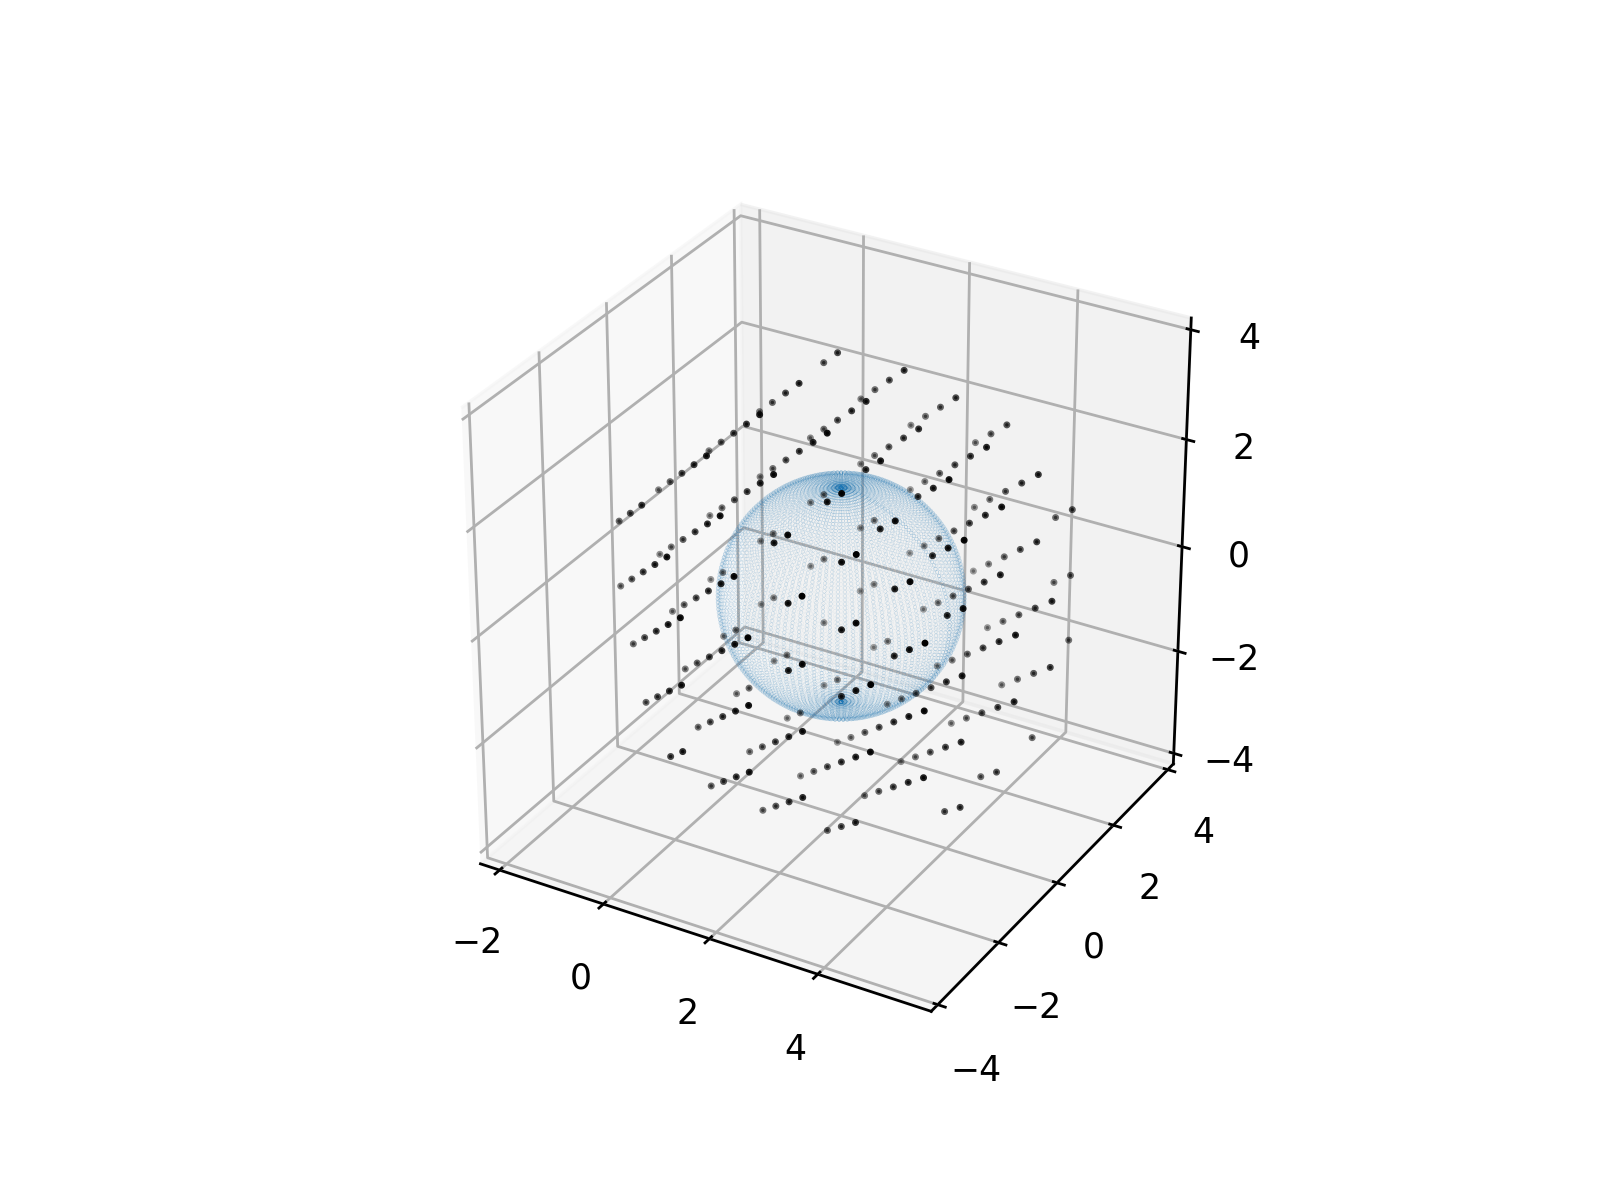

In [7]:
lat_type = "fcc"
lat_const = 10.26
lat_vecs = make_rptvecs(lat_type, lat_const)
r1 = 2
r2 = 4
offset = [2,0,0]
grid = hollow_sphere_pts(lat_vecs,r1**2,r2**2,offset)

PlotGrid(grid,r1**2,offset)

#### Test sphere_pts more thoroughly. It appears to work but there a lot of points created outside the sphere. Let's find the ratio of points outside to those inside.

In [9]:
lat_type_list = ["fcc","bcc", "sc"]
lat_const_list = [10,10.1, 3*np.pi]
offset_list = [[1.3, 1.1,1.7],[11,9,8],[np.pi,np.pi,np.pi]]
r_list = [1, 2.3, np.pi]

for lat_type in lat_type_list:
    for lat_const in lat_const_list:
        lat_vecs = make_rptvecs(lat_type,lat_const)
        for offset in offset_list:
            offset = np.asarray(offset)
            for r in r_list:
                # print(1/test_sphere_pts2(lat_vecs,r,offset))
                total_grid = test_sphere_pts(lat_vecs,r,offset)
                grid = sphere_pts(lat_vecs,r,offset)
                contained = False
                for tg in total_grid:
                    if np.dot(tg-offset,tg-offset) <= r:
                        contained = False
                        for g in grid:
                            if np.allclose(g,tg):
                                contained = True
                        if not contained:
                            print("missed a point")

<IPython.core.display.Javascript object>


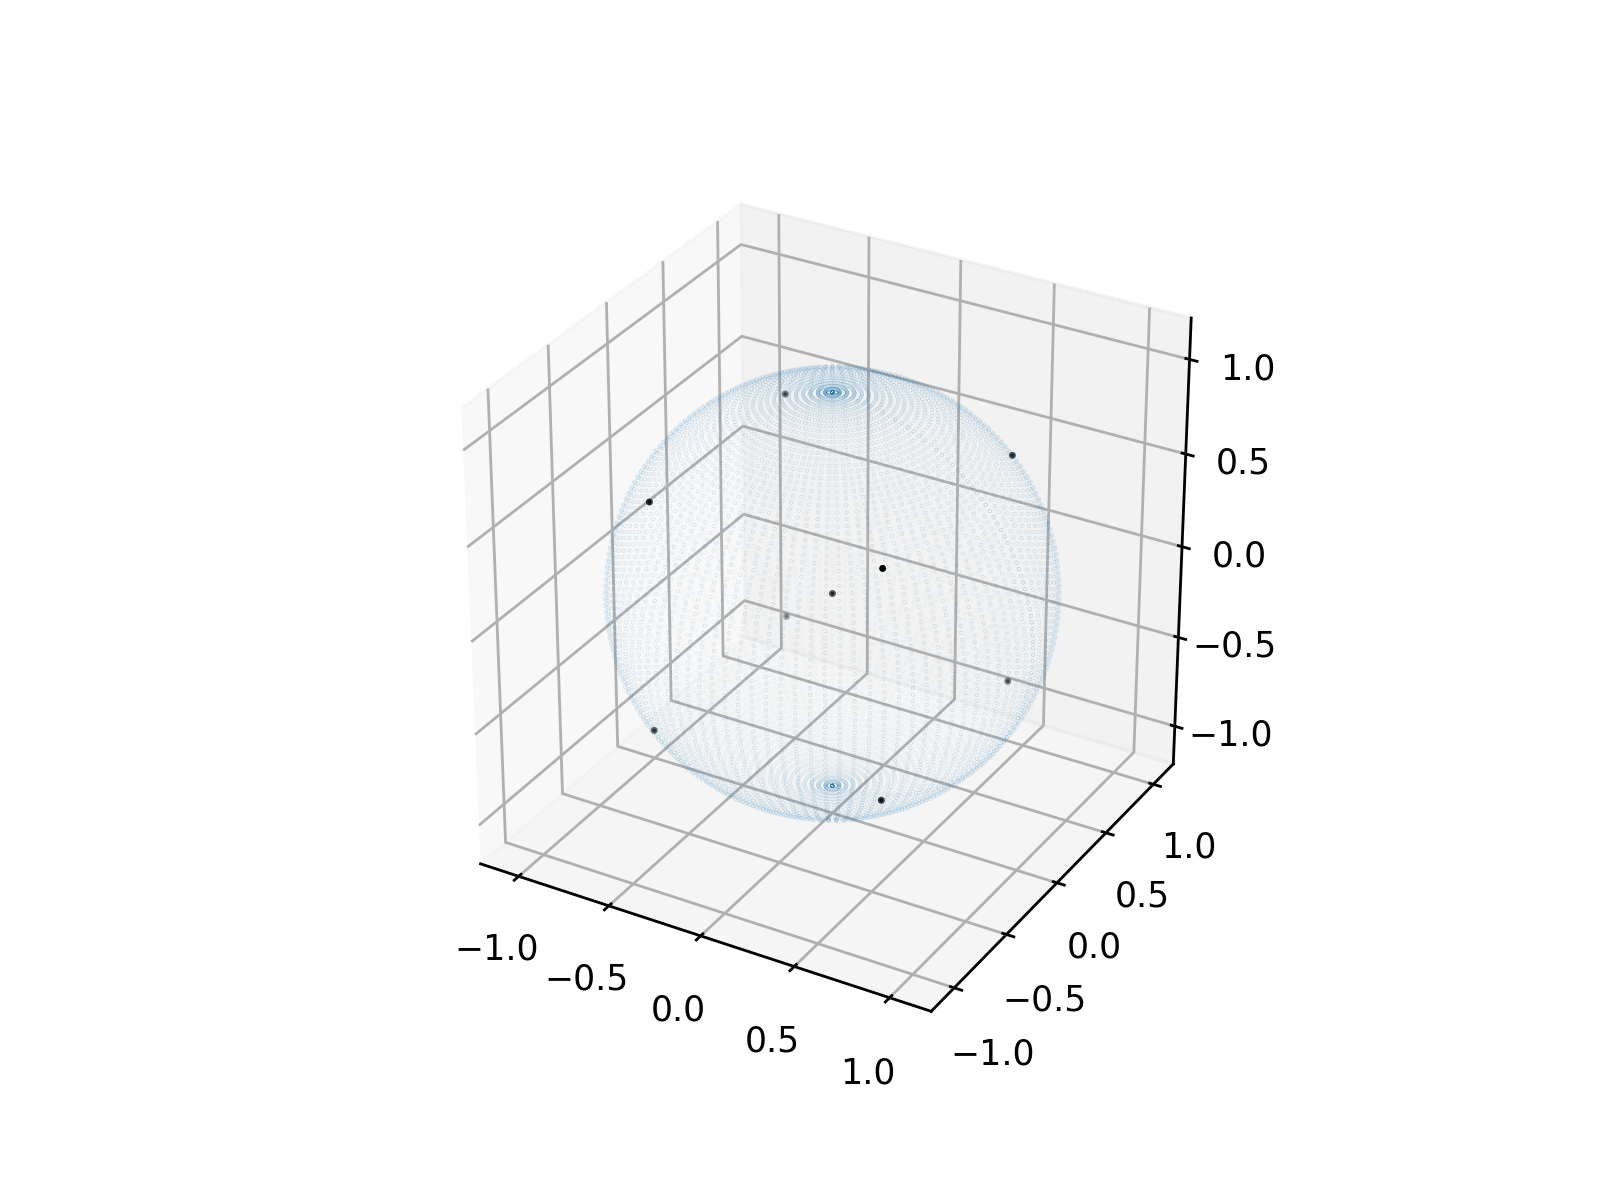

In [11]:
lat_type = "fcc"
lat_const = 10.26
lat_vecs = make_rptvecs(lat_type, lat_const)
r2 = 3.*(2*np.pi/lat_const)**2
# offset = [2.,2.,2.]
offset = [0.,0.,0.]
grid = sphere_pts(lat_vecs,r2,offset)

PlotGrid(grid,r2,offset)

<IPython.core.display.Javascript object>


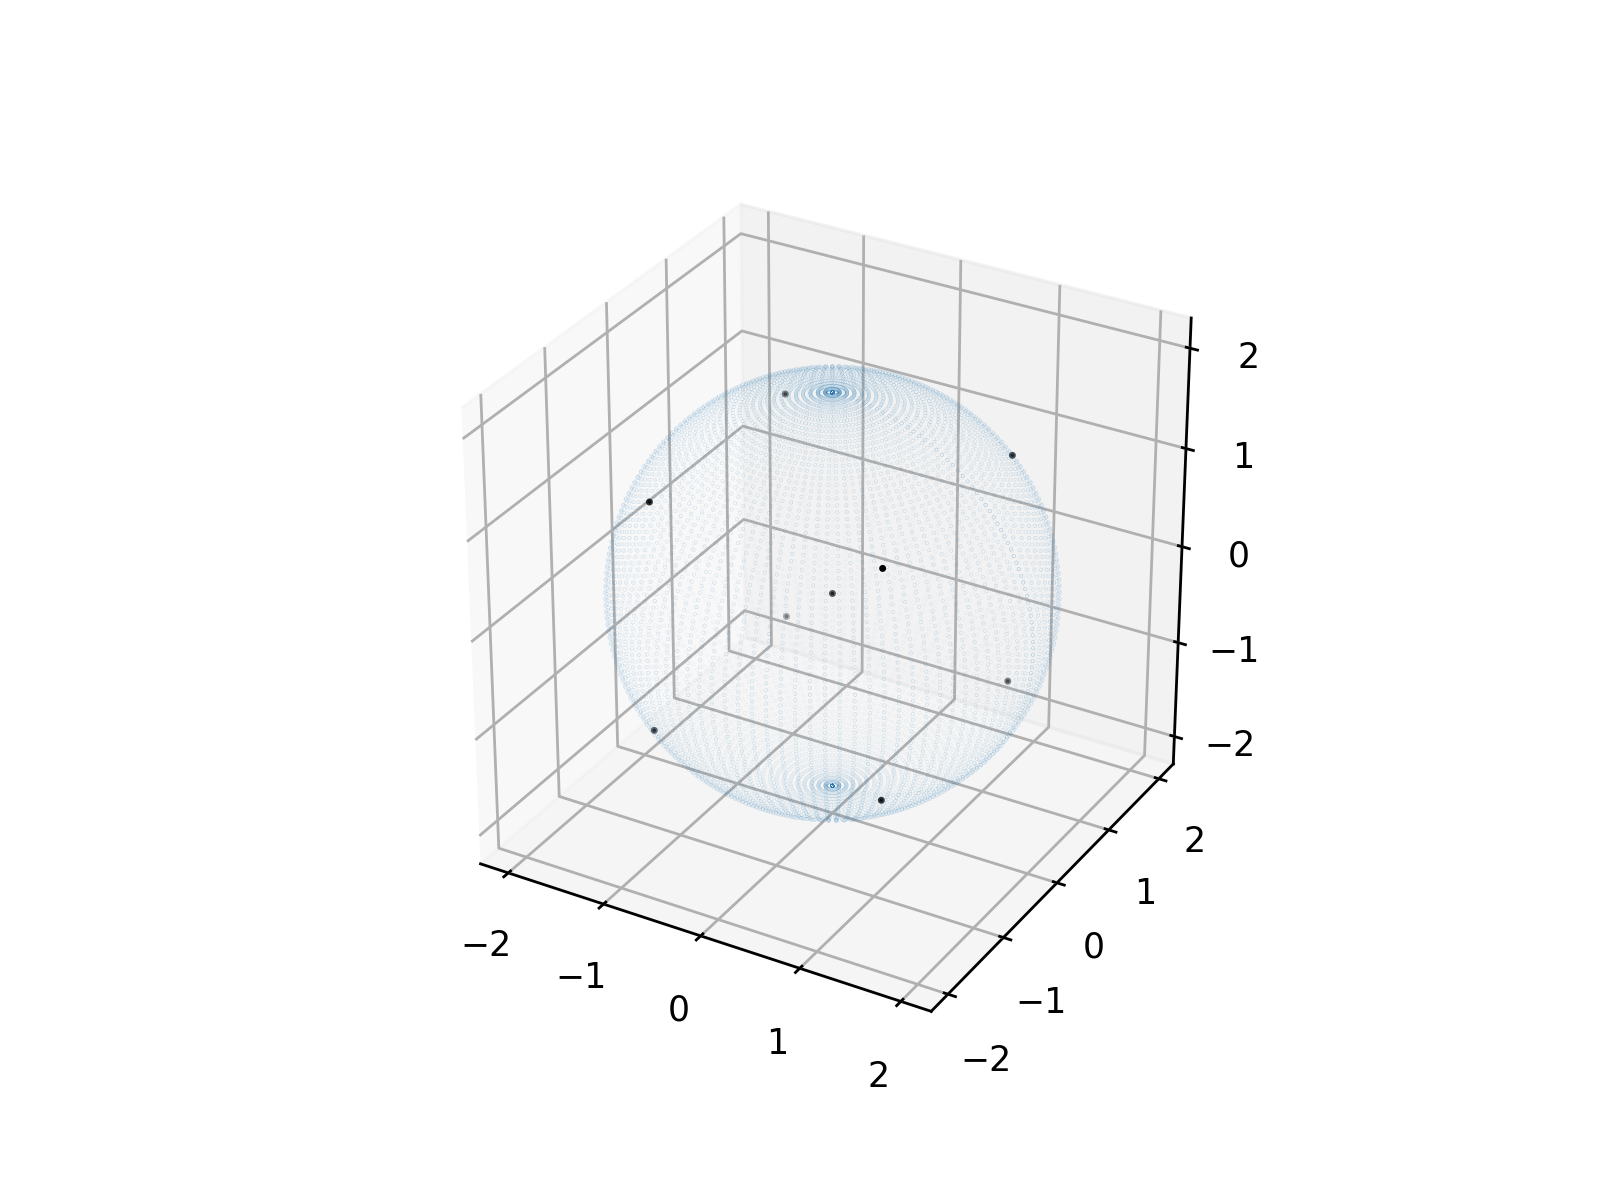

In [12]:
ab = 1.88973
lat_type = "fcc"
lat_const = 5.43
lat_vecs = make_rptvecs(lat_type, lat_const)
r2 = 3.*(2*np.pi/lat_const)**2
offset = [0.,0.,0.]
grid = sphere_pts(lat_vecs,r2,offset)
PlotGrid(grid,r2,offset)

In [14]:
ab = 1.88973
lat_type = "fcc"
lat_const = 5.43
lat_vecs = make_rptvecs(lat_type, lat_const)
r2 = 1000.*(2*np.pi/lat_const)**2
offset = [0.,0.,0.]
grid = sphere_pts(lat_vecs,r2,offset)
print(len(grid))

33223
